In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
df = pd.read_csv('./nba_scraped_data.csv')
df

,#,PLAYER,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,YEAR
0,2023-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Joel Embiid,PHI,25.0,34.2,35.0,11.8,21.8,54.0,1.1,...,89.3,2.8,8.9,11.7,6.0,1.2,2.0,3.8,40.7,2023-24
2,2,Luka Doncic,DAL,27.0,36.8,32.9,11.3,23.3,48.5,3.9,...,77.3,0.9,7.7,8.6,9.1,1.3,0.5,4.0,34.5,2023-24
3,3,Kevin Durant,PHX,24.0,36.6,30.9,10.7,20.5,52.1,2.2,...,87.1,0.4,5.8,6.2,5.4,0.8,1.1,3.5,29.9,2023-24
4,4,Shai Gilgeous-Alexander,OKC,26.0,34.7,30.8,11.1,20.8,53.5,1.0,...,91.2,0.9,4.8,5.7,6.3,2.8,0.8,2.0,34.0,2023-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,257,Jaxson Hayes,LAL,27.0,10.7,3.0,1.2,1.8,67.3,0.0,...,57.7,0.5,1.4,1.9,0.4,0.2,0.4,0.6,4.3,2023-24
258,258,Andre Jackson Jr.,MIL,23.0,10.4,2.7,1.1,1.9,58.1,0.5,...,50.0,0.9,0.9,1.8,1.0,0.3,0.0,0.5,4.3,2023-24
259,259,Furkan Korkmaz,PHI,20.0,6.9,1.9,0.7,1.8,36.1,0.3,...,77.8,0.1,0.5,0.5,0.5,0.5,0.0,0.4,1.8,2023-24
260,260,Cody Zeller,NOP,22.0,10.0,1.9,0.6,1.8,33.3,0.0,...,57.7,1.2,1.9,3.1,1.2,0.2,0.1,0.4,4.4,2023-24


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   #       262 non-null    object 
 1   PLAYER  261 non-null    object 
 2   TEAM    261 non-null    object 
 3   GP      261 non-null    float64
 4   MIN     261 non-null    float64
 5   PTS     261 non-null    float64
 6   FGM     261 non-null    float64
 7   FGA     261 non-null    float64
 8   FG%     261 non-null    float64
 9   3PM     261 non-null    float64
 10  3PA     261 non-null    float64
 11  3P%     261 non-null    float64
 12  FTM     261 non-null    float64
 13  FTA     261 non-null    float64
 14  FT%     261 non-null    float64
 15  OREB    261 non-null    float64
 16  DREB    261 non-null    float64
 17  REB     261 non-null    float64
 18  AST     261 non-null    float64
 19  STL     261 non-null    float64
 20  BLK     261 non-null    float64
 21  TOV     261 non-null    float64
 22  EF

# Data Cleaning

In [114]:
# Drop rows that have 'NaN' values and '#' column
df = df.dropna()
df = df.drop('#', axis=1)

In [139]:
# Create a rearranged list 
arrange_columns = ['YEAR', 'PLAYER', 'TEAM', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'EFF']

# Set dataframe to new columns
df = df[arrange_columns]

df.head()

,YEAR,PLAYER,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
1,2023-24,Joel Embiid,PHI,25.0,34.2,35.0,11.8,21.8,54.0,1.1,...,11.6,89.3,2.8,8.9,11.7,6.0,1.2,2.0,3.8,40.7
2,2023-24,Luka Doncic,DAL,27.0,36.8,32.9,11.3,23.3,48.5,3.9,...,8.3,77.3,0.9,7.7,8.6,9.1,1.3,0.5,4.0,34.5
3,2023-24,Kevin Durant,PHX,24.0,36.6,30.9,10.7,20.5,52.1,2.2,...,8.4,87.1,0.4,5.8,6.2,5.4,0.8,1.1,3.5,29.9
4,2023-24,Shai Gilgeous-Alexander,OKC,26.0,34.7,30.8,11.1,20.8,53.5,1.0,...,8.3,91.2,0.9,4.8,5.7,6.3,2.8,0.8,2.0,34.0
5,2023-24,Giannis Antetokounmpo,MIL,28.0,34.8,30.8,11.4,18.9,60.4,0.4,...,11.3,67.2,2.6,8.3,10.9,5.5,1.4,1.2,3.9,34.6


In [116]:
# Show the change
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 1 to 261
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PLAYER  261 non-null    object 
 1   YEAR    261 non-null    object 
 2   TEAM    261 non-null    object 
 3   GP      261 non-null    float64
 4   MIN     261 non-null    float64
 5   PTS     261 non-null    float64
 6   FGM     261 non-null    float64
 7   FGA     261 non-null    float64
 8   FG%     261 non-null    float64
 9   3PM     261 non-null    float64
 10  3PA     261 non-null    float64
 11  3P%     261 non-null    float64
 12  FTM     261 non-null    float64
 13  FTA     261 non-null    float64
 14  FT%     261 non-null    float64
 15  OREB    261 non-null    float64
 16  DREB    261 non-null    float64
 17  REB     261 non-null    float64
 18  AST     261 non-null    float64
 19  STL     261 non-null    float64
 20  BLK     261 non-null    float64
 21  TOV     261 non-null    float64
 22  EF

# Visualization

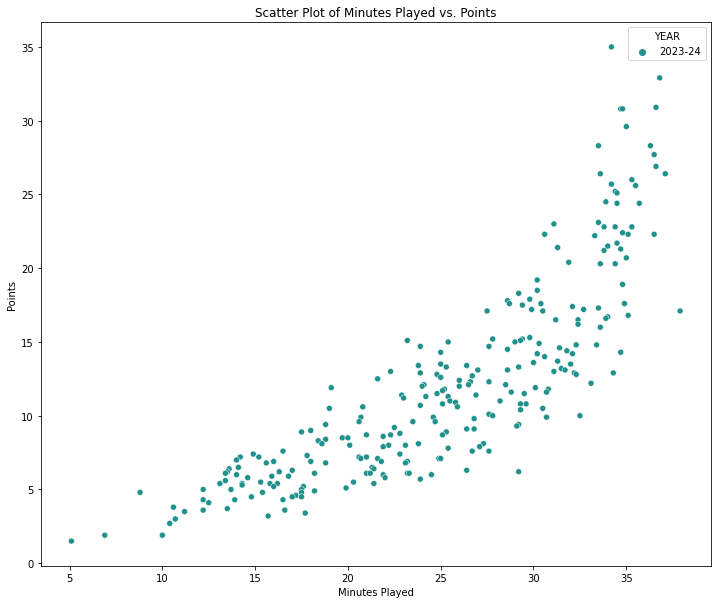

In [117]:
# Create a scatter plot on minutes vs points scored
plt.figure(figsize=(12, 10))
sns.scatterplot(x='MIN', y='PTS', data=df, hue='YEAR', palette='viridis')
plt.title('Scatter Plot of Minutes Played vs. Points')
plt.xlabel('Minutes Played')
plt.ylabel('Points')
plt.show()


In [118]:
# Find the top 10 players with the most assists the of the 2023-24 season
assists_df = df.loc[df['AST'] >=6].head(10)
assists_df.sort_values(by='AST', ascending=False, inplace=True)
assists_df

,PLAYER,YEAR,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
18,Tyrese Haliburton,2023-24,IND,25.0,33.9,24.5,8.7,17.4,50.0,3.4,...,4.3,86.1,0.6,3.3,3.9,12.2,0.9,0.6,2.8,30.1
7,Trae Young,2023-24,ATL,27.0,36.3,28.3,8.9,20.4,43.6,3.6,...,8.0,86.6,0.5,2.6,3.1,11.2,1.3,0.2,4.2,27.3
12,Nikola Jokic,2023-24,DEN,30.0,33.6,26.4,10.3,18.8,54.5,1.2,...,5.9,79.5,3.2,9.0,12.3,9.2,1.2,0.8,2.6,37.6
2,Luka Doncic,2023-24,DAL,27.0,36.8,32.9,11.3,23.3,48.5,3.9,...,8.3,77.3,0.9,7.7,8.6,9.1,1.3,0.5,4.0,34.5
14,LeBron James,2023-24,LAL,27.0,34.2,25.7,9.6,17.6,54.4,2.3,...,5.8,73.9,1.0,6.7,7.7,7.3,1.5,0.7,3.4,30.1
13,Damian Lillard,2023-24,MIL,27.0,35.3,26.0,7.5,17.3,43.4,3.3,...,8.3,92.0,0.6,4.0,4.7,7.0,1.1,0.2,2.7,25.7
11,Tyrese Maxey,2023-24,PHI,27.0,37.1,26.4,9.1,19.5,46.8,3.3,...,5.3,90.3,0.6,3.3,3.9,6.8,0.8,0.5,1.6,25.9
4,Shai Gilgeous-Alexander,2023-24,OKC,26.0,34.7,30.8,11.1,20.8,53.5,1.0,...,8.3,91.2,0.9,4.8,5.7,6.3,2.8,0.8,2.0,34.0
6,De'Aaron Fox,2023-24,SAC,22.0,35.0,29.6,10.4,21.6,48.0,3.2,...,7.6,73.8,0.9,3.5,4.4,6.2,1.6,0.4,2.5,26.5
1,Joel Embiid,2023-24,PHI,25.0,34.2,35.0,11.8,21.8,54.0,1.1,...,11.6,89.3,2.8,8.9,11.7,6.0,1.2,2.0,3.8,40.7


In [140]:
# Find the top 10 players with the most rebounds the of the 2023-24 season
rebounds_df = df.loc[df['REB'] >= 6].head(10)
rebounds_df .sort_values(by='REB', ascending=False, inplace=True)
rebounds_df 

,YEAR,PLAYER,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
20,2023-24,Anthony Davis,LAL,28.0,35.7,24.4,9.2,16.9,54.5,0.3,...,7.0,80.5,3.4,9.0,12.4,3.1,1.1,2.5,2.0,32.5
12,2023-24,Nikola Jokic,DEN,30.0,33.6,26.4,10.3,18.8,54.5,1.2,...,5.9,79.5,3.2,9.0,12.3,9.2,1.2,0.8,2.6,37.6
1,2023-24,Joel Embiid,PHI,25.0,34.2,35.0,11.8,21.8,54.0,1.1,...,11.6,89.3,2.8,8.9,11.7,6.0,1.2,2.0,3.8,40.7
5,2023-24,Giannis Antetokounmpo,MIL,28.0,34.8,30.8,11.4,18.9,60.4,0.4,...,11.3,67.2,2.6,8.3,10.9,5.5,1.4,1.2,3.9,34.6
23,2023-24,Julius Randle,NYK,28.0,35.3,22.8,8.3,17.9,46.4,1.5,...,6.3,76.6,2.0,7.4,9.5,5.0,0.6,0.2,3.2,23.9
2,2023-24,Luka Doncic,DAL,27.0,36.8,32.9,11.3,23.3,48.5,3.9,...,8.3,77.3,0.9,7.7,8.6,9.1,1.3,0.5,4.0,34.5
10,2023-24,Jayson Tatum,BOS,27.0,36.6,26.9,9.3,19.4,47.9,3.0,...,6.7,79.4,0.9,7.7,8.5,4.1,1.0,0.5,2.9,26.6
14,2023-24,LeBron James,LAL,27.0,34.2,25.7,9.6,17.6,54.4,2.3,...,5.8,73.9,1.0,6.7,7.7,7.3,1.5,0.7,3.4,30.1
3,2023-24,Kevin Durant,PHX,24.0,36.6,30.9,10.7,20.5,52.1,2.2,...,8.4,87.1,0.4,5.8,6.2,5.4,0.8,1.1,3.5,29.9
22,2023-24,Kyle Kuzma,WAS,28.0,31.1,23.0,8.9,18.9,46.8,2.4,...,3.8,76.4,0.9,5.4,6.2,4.2,0.3,0.6,2.5,20.9


In [120]:
# Find the top 10 scorers of the 2023-24 season
top_ten_df = df.loc[df['YEAR'] == '2023-24'].head(10)
top_ten_df.sort_values(by='PTS', ascending=False, inplace=True)
top_ten_df

,PLAYER,YEAR,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
1,Joel Embiid,2023-24,PHI,25.0,34.2,35.0,11.8,21.8,54.0,1.1,...,11.6,89.3,2.8,8.9,11.7,6.0,1.2,2.0,3.8,40.7
2,Luka Doncic,2023-24,DAL,27.0,36.8,32.9,11.3,23.3,48.5,3.9,...,8.3,77.3,0.9,7.7,8.6,9.1,1.3,0.5,4.0,34.5
3,Kevin Durant,2023-24,PHX,24.0,36.6,30.9,10.7,20.5,52.1,2.2,...,8.4,87.1,0.4,5.8,6.2,5.4,0.8,1.1,3.5,29.9
4,Shai Gilgeous-Alexander,2023-24,OKC,26.0,34.7,30.8,11.1,20.8,53.5,1.0,...,8.3,91.2,0.9,4.8,5.7,6.3,2.8,0.8,2.0,34.0
5,Giannis Antetokounmpo,2023-24,MIL,28.0,34.8,30.8,11.4,18.9,60.4,0.4,...,11.3,67.2,2.6,8.3,10.9,5.5,1.4,1.2,3.9,34.6
6,De'Aaron Fox,2023-24,SAC,22.0,35.0,29.6,10.4,21.6,48.0,3.2,...,7.6,73.8,0.9,3.5,4.4,6.2,1.6,0.4,2.5,26.5
7,Trae Young,2023-24,ATL,27.0,36.3,28.3,8.9,20.4,43.6,3.6,...,8.0,86.6,0.5,2.6,3.1,11.2,1.3,0.2,4.2,27.3
8,Stephen Curry,2023-24,GSW,27.0,33.5,28.3,8.9,18.8,47.0,4.9,...,6.1,93.3,0.5,4.1,4.6,4.4,0.7,0.3,3.2,24.7
9,Donovan Mitchell,2023-24,CLE,22.0,36.5,27.7,9.6,21.3,45.3,3.1,...,6.0,88.7,1.1,4.5,5.6,5.5,1.8,0.5,2.6,26.1
10,Jayson Tatum,2023-24,BOS,27.0,36.6,26.9,9.3,19.4,47.9,3.0,...,6.7,79.4,0.9,7.7,8.5,4.1,1.0,0.5,2.9,26.6


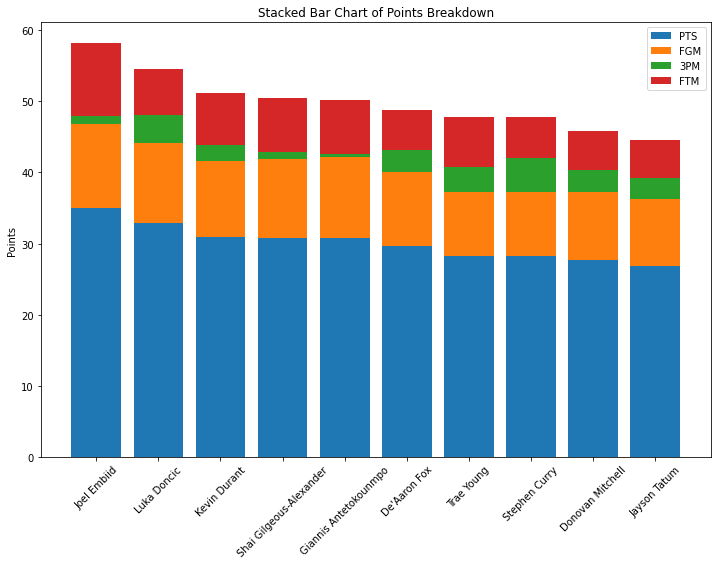

In [122]:
# Create stacked bar plot
fig, ax = plt.subplots(figsize=(12, 8))

# Stack the bars for different categories
bottom = None
for col in ['PTS', 'FGM', '3PM', 'FTM']:
    ax.bar(top_ten_df['PLAYER'], top_ten_df[col], label=col, bottom=bottom)
    if bottom is None:
        bottom = top_ten_df[col]
    else:
        bottom += top_ten_df[col]

ax.set_ylabel('Points')
ax.set_title('Stacked Bar Chart of Points Breakdown')
ax.legend()
plt.xticks(rotation=45)
plt.show()

In [123]:
# Create a dataframe for players with the most rebounds
top_ten_rebounds = df.loc[df['REB'] > 4].head(10)
top_ten_rebounds = top_ten_rebounds[['PLAYER', 'YEAR', 'MIN', 'PTS', 'REB']]
top_ten_rebounds_sorted = top_ten_rebounds.sort_values(by='REB', ascending=False)

In [124]:
print(top_ten_rebounds_sorted)

                     PLAYER     YEAR   MIN   PTS   REB
12             Nikola Jokic  2023-24  33.6  26.4  12.3
1               Joel Embiid  2023-24  34.2  35.0  11.7
5     Giannis Antetokounmpo  2023-24  34.8  30.8  10.9
2               Luka Doncic  2023-24  36.8  32.9   8.6
10             Jayson Tatum  2023-24  36.6  26.9   8.5
3              Kevin Durant  2023-24  36.6  30.9   6.2
4   Shai Gilgeous-Alexander  2023-24  34.7  30.8   5.7
9          Donovan Mitchell  2023-24  36.5  27.7   5.6
8             Stephen Curry  2023-24  33.5  28.3   4.6
6              De'Aaron Fox  2023-24  35.0  29.6   4.4


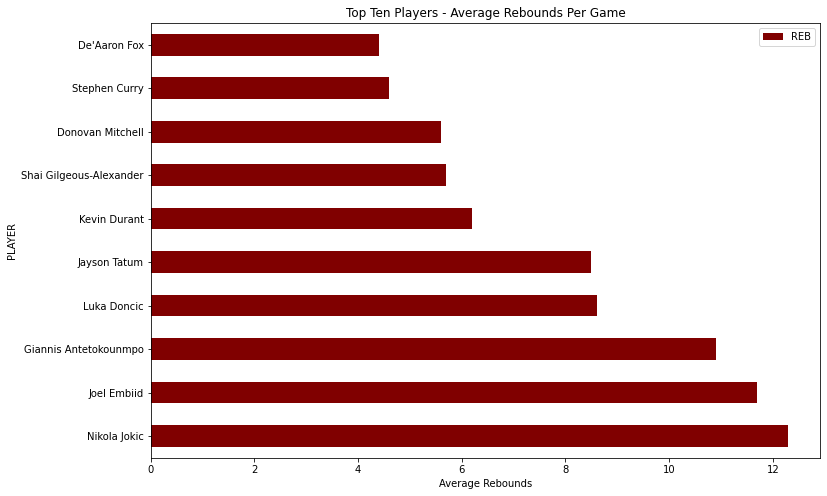

In [125]:
# Plotting bars in descending order
top_ten_rebounds_sorted.plot.barh(x='PLAYER', y='REB', color='maroon', figsize=(12, 8))

# Adding labels and title
plt.xlabel('Average Rebounds')
plt.title('Top Ten Players - Average Rebounds Per Game')

# Display the plot
plt.show()

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 1 to 261
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PLAYER  261 non-null    object 
 1   YEAR    261 non-null    object 
 2   TEAM    261 non-null    object 
 3   GP      261 non-null    float64
 4   MIN     261 non-null    float64
 5   PTS     261 non-null    float64
 6   FGM     261 non-null    float64
 7   FGA     261 non-null    float64
 8   FG%     261 non-null    float64
 9   3PM     261 non-null    float64
 10  3PA     261 non-null    float64
 11  3P%     261 non-null    float64
 12  FTM     261 non-null    float64
 13  FTA     261 non-null    float64
 14  FT%     261 non-null    float64
 15  OREB    261 non-null    float64
 16  DREB    261 non-null    float64
 17  REB     261 non-null    float64
 18  AST     261 non-null    float64
 19  STL     261 non-null    float64
 20  BLK     261 non-null    float64
 21  TOV     261 non-null    float64
 22  EF

In [128]:
# Export cleaned data frame
file_path = 'nba_cleaned_data.csv'
df.to_csv(file_path, index=False)

# Machine Learning


In [132]:
df.columns

Index(['PLAYER', 'YEAR', 'TEAM', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%',
       '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST',
       'STL', 'BLK', 'TOV', 'EFF'],
      dtype='object')

Text(0.5, 1.0, 'Correlation')

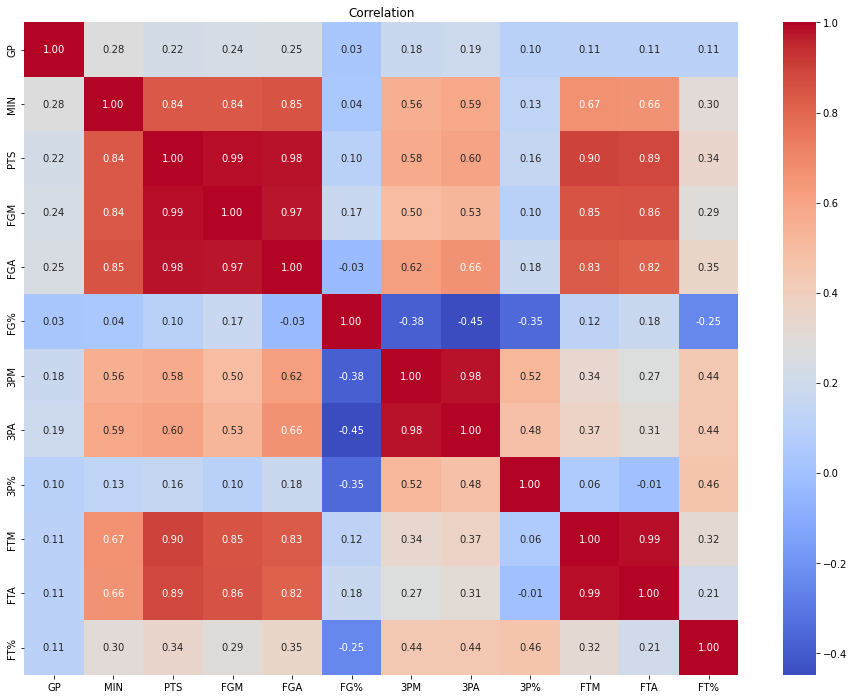

In [137]:
heatmap_columns = ['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%',
       '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%']

# Create heatmap dataframe
heatmap_data = df[heatmap_columns]

# Create heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation')

c:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


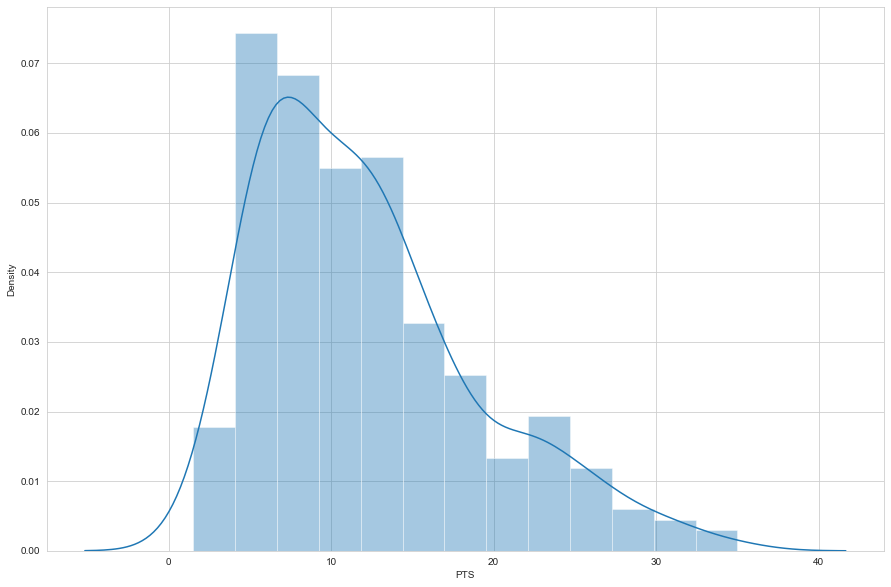

In [138]:
# Distribution of the values in the Points column
sns.set_style('whitegrid')
plt.figure(figsize=(15, 10))
sns.distplot(df['PTS'])
plt.show()